### EDA

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

Diccionario:

•	VendorID: Un código que indica el proveedor TPEP que proporcionó el registro. 
1 = Creative Mobile Technologies, LLC; 2 = VeriFone Inc.
•	tpep_pickup_datetime: La fecha y hora en que se activó el taxímetro.

•	tpep_dropoff_datetime: La fecha y hora en que se desactivó el taxímetro.

•	Passenger_count: El número de pasajeros en el vehículo. Este valor es ingresado por el conductor.

•	Trip_distance: La distancia recorrida durante el viaje en millas, reportada por el taxímetro.

•	PULocationID TLC: La zona de taxi en la que se activó el taxímetro.

•	DOLocationID TLC: La zona de taxi en la que se desactivó el taxímetro.

•	RateCodeID: El código de tarifa final vigente al final del viaje. 1 = Tarifa estándar, 2 = JFK, 3 = Newark, 4 = Nassau o Westchester, 5 = Tarifa negociada, 6 = Viaje en grupo.

•	Store_and_fwd_flag: Esta bandera indica si el registro del viaje se almacenó en la memoria del vehículo antes de ser enviado al proveedor, es decir, "almacenar y reenviar", debido a que el vehículo no tenía conexión con el servidor. Y = viaje almacenado y reenviado, N = no es un viaje almacenado y reenviado.

•	Payment_type: Un código numérico que indica cómo el pasajero pagó el viaje. 1 = Tarjeta de crédito, 2 = Efectivo, 3 = Sin cargo, 4 = Disputa, 5 = Desconocido, 6 = Viaje anulado.

•	Fare_amount: La tarifa calculada por tiempo y distancia según lo registrado por el taxímetro.

•	Extra: Extras y recargos varios. Actualmente, esto incluye solo los recargos de $0.50 y $1 por horario punta y recargos nocturnos.

•	MTA_tax $0.50: Impuesto MTA que se activa automáticamente según la tarifa registrada en uso.

•	Improvement_surcharge: Recargo de mejora de $0.30 para viajes a partir del momento de la bandera. Este recargo comenzó a aplicarse en 2015.

•	Tip_amount: Monto de propina. Este campo se llena automáticamente para las propinas con tarjeta de crédito. Las propinas en efectivo no están incluidas.

•	Tolls_amount: Monto total de los peajes pagados durante el viaje.

•	Total_amount: El monto total cargado a los pasajeros. No incluye las propinas en efectivo.

•	Congestion_Surcharge: Monto total recaudado en el viaje por el recargo de congestión del estado de Nueva York.

•	Airport_fee: $1.25 por recogida únicamente en los aeropuertos LaGuardia y John F. Kennedy


Disponibilizo los archivos:

In [21]:
df1 = pd.read_csv('taxi_2023-01.csv')

C:\Users\COMPUTER\AppData\Local\Temp\ipykernel_10084\4261242335.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('taxi_2023-01.csv')


In [22]:
df2 = pd.read_parquet('green_tripdata_2023-01.parquet')

Para estos archivos lo que se hizo fue tomar una muestra de un mes del año 2023 del mes de enero en Estados Unidos. 

Antes de empezar se realizo una modificacion para que los datos obtenidos sean de los distritos de New York y no de las localidades se generaron dos columnas nuevas una 
'PULBoroughs', y la otra 'DOLBoroughs' con los nombres de los distritos.

In [ ]:
unique_pulocation_ids = df1['PULocationID'].unique()
unique_pulocation_ids


In [9]:
pulocationid_to_borough = {
161: 'Queens',
    43: 'Bronx',
    48: 'Manhattan',
    138: 'Queens',
    107: 'Brooklyn',
    239: 'Manhattan',
    142: 'Queens',
    164: 'Brooklyn',
    141: 'Queens',
    234: 'Manhattan',
    79: 'Brooklyn',
    33: 'Brooklyn',
    90: 'Brooklyn',
    113: 'Queens',
    237: 'Manhattan',
    143: 'Queens',
    137: 'Queens',
    132: 'Queens',
    163: 'Brooklyn',
    68: 'Brooklyn',
    263: 'Manhattan',
    170: 'Brooklyn',
    233: 'Manhattan',
    236: 'Queens',
    144: 'Queens',
    229: 'Manhattan',
    249: 'Manhattan',
    162: 'Queens',
    224: 'Manhattan',
    151: 'Queens',
    211: 'Manhattan',
    148: 'Queens',
    238: 'Manhattan',
    231: 'Manhattan',
    13: 'Manhattan',
    262: 'Manhattan',
    75: 'Brooklyn',
    264: 'Manhattan',
    125: 'Queens',
    186: 'Queens',
    158: 'Queens',
    246: 'Manhattan',
    50: 'Brooklyn',
    4: 'Manhattan',
    87: 'Brooklyn',
    114: 'Queens',
    24: 'Manhattan',
    166: 'Brooklyn',
    41: 'Manhattan',
    25: 'Manhattan',
    194: 'Manhattan',
    74: 'Brooklyn',
    140: 'Queens',
    146: 'Queens',
    65: 'Brooklyn',
    181: 'Brooklyn',
    255: 'Manhattan',
    256: 'Manhattan',
    88: 'Brooklyn',
    232: 'Manhattan',
    193: 'Manhattan',
    226: 'Manhattan',
    97: 'Brooklyn',
    197: 'Manhattan',
    37: 'Manhattan',
    189: 'Queens',
    261: 'Manhattan',
    225: 'Manhattan',
    244: 'Manhattan',
    45: 'Manhattan',
    40: 'Manhattan',
    116: 'Queens',
    80: 'Brooklyn',
    209: 'Manhattan',
    243: 'Manhattan',
    60: 'Brooklyn',
    265: 'Manhattan',
    100: 'Brooklyn',
    70: 'Brooklyn',
    188: 'Queens',
    52: 'Brooklyn',
    7: 'Manhattan',
    159: 'Queens',
    66: 'Brooklyn',
    42: 'Manhattan',
    174: 'Queens',
    215: 'Manhattan',
    252: 'Manhattan',
    136: 'Queens',
    223: 'Manhattan',
    93: 'Brooklyn',
    12: 'Manhattan',
    39: 'Manhattan',
    122: 'Queens',
    195: 'Manhattan',
    61: 'Brooklyn',
    112: 'Queens',
    230: 'Manhattan',
    82: 'Brooklyn',
    106: 'Brooklyn',
    228: 'Manhattan',
    179: 'Queens',
    260: 'Manhattan',
    152: 'Queens',
    121: 'Queens',
    49: 'Brooklyn',
    198: 'Manhattan',
    83: 'Brooklyn',
    17: 'Manhattan',
    168: 'Queens',
    56: 'Brooklyn',
    119: 'Queens',
    145: 'Queens',
    129: 'Queens',
    36: 'Manhattan',
    1: 'Manhattan',
    95: 'Brooklyn',
    34: 'Manhattan',
    160: 'Queens',
    196: 'Manhattan',
    10: 'Manhattan',
    102: 'Brooklyn',
    247: 'Manhattan',
    86: 'Brooklyn',
    28: 'Manhattan',
    54: 'Brooklyn',
    77: 'Brooklyn',
    240: 'Manhattan',
    32: 'Manhattan',
    218: 'Manhattan',
    219: 'Manhattan',
    133: 'Queens',
    89: 'Brooklyn',
    156: 'Queens',
    177: 'Queens',
    85: 'Brooklyn',
    173: 'Queens',
    69: 'Brooklyn',
    14: 'Manhattan',
    51: 'Brooklyn',
    202: 'Manhattan',
    165: 'Queens',
    254: 'Manhattan',
    235: 'Manhattan',
    127: 'Queens',
    131: 'Queens',
    191: 'Queens',
    157: 'Queens',
    130: 'Queens',
    182: 'Queens',
    241: 'Manhattan',
    11: 'Manhattan',
    62: 'Brooklyn',
    258: 'Manhattan',
    169: 'Queens',
    123: 'Queens',
    47: 'Manhattan',
    6: 'Manhattan',
    22: 'Manhattan',
    135: 'Queens',
    216: 'Manhattan',
    155: 'Queens',
    63: 'Brooklyn',
    91: 'Brooklyn',
    94: 'Brooklyn',
    108: 'Queens',
     92: 'Brooklyn',
     44: 'Manhattan',
    259: 'Manhattan',
    124: 'Queens',
     78: 'Brooklyn',
    171: 'Queens',
    149: 'Queens',
     55: 'Brooklyn',
    180: 'Brooklyn',
     35: 'Manhattan',
     81: 'Brooklyn',
    257: 'Manhattan',
    139: 'Queens',
     72: 'Brooklyn',
     71: 'Brooklyn',
     19: 'Manhattan',
     73: 'Brooklyn',
    200: 'Manhattan',
    222: 'Manhattan',
    208: 'Manhattan',
     76: 'Brooklyn',
    210: 'Manhattan',
     15: 'Manhattan',
    147: 'Queens',
    167: 'Queens',
    126: 'Queens',
    213: 'Manhattan',
      5: 'Manhattan',
     96: 'Brooklyn',
    248: 'Manhattan',
    205: 'Manhattan',
     21: 'Manhattan',
    250: 'Manhattan',
    153: 'Queens',
     18: 'Manhattan',
    134: 'Queens',
    242: 'Manhattan',
    192: 'Manhattan',
      98: 'Brooklyn',
      8: 'Manhattan',
     31: 'Manhattan',
     26: 'Manhattan',
     67: 'Brooklyn',
    203: 'Manhattan',
    201: 'Manhattan',
     30: 'Manhattan',
    220: 'Manhattan',
    227: 'Manhattan',
     53: 'Brooklyn',
     20: 'Manhattan',
     38: 'Manhattan',
    185: 'Queens',
    251: 'Manhattan',
    212: 'Manhattan',
    183: 'Queens',
    207: 'Manhattan',
      9: 'Manhattan',
    175: 'Queens',
     16: 'Manhattan',
     23: 'Manhattan',
      3: 'Manhattan',
    117: 'Queens',
     64: 'Brooklyn',
    217: 'Manhattan',
    253: 'Manhattan',
    190: 'Queens',
    111: 'Queens',
    115: 'Queens',
     29: 'Manhattan',
    101: 'Brooklyn',
    154: 'Queens',
    178: 'Queens',
    150: 'Queens',
     57: 'Brooklyn',
    120: 'Queens',
    199: 'Manhattan',
    214: 'Manhattan',
    128: 'Queens',
    187: 'Queens',
    221: 'Manhattan',
    118: 'Queens',
    206: 'Manhattan',
    109: 'Queens',
    184: 'Queens',
    204: 'Manhattan',
    172: 'Queens',
     99: 'Brooklyn',
    245: 'Manhattan',
     46: 'Manhattan',
      2: 'Manhattan',
     58: 'Brooklyn'
    # Agrega más mapeos aquí para todos los PULocationID
}

In [10]:
df1['PULBoroughs'] = df1['PULocationID'].map(pulocationid_to_borough)
df1['DOLBoroughs'] = df1['DOLocationID'].map(pulocationid_to_borough)

In [11]:

df2['PULBoroughs'] = df2['PULocationID'].map(pulocationid_to_borough)
df2['DOLBoroughs'] = df2['DOLocationID'].map(pulocationid_to_borough)

In [37]:
df1.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
count,3.066766e+06,2.995023e+06,3.066766e+06,2.995023e+06,3.066766e+06,3.066766e+06,3.066766e+06,3.066766e+06,3.066766e+06,3.066766e+06,3.066766e+06,3.066766e+06,3.066766e+06,3.066766e+06,2.995023e+06,2.995023e+06
mean,1.730215e+00,1.362532e+00,3.847342e+00,1.497440e+00,1.663980e+02,1.643926e+02,1.194483e+00,1.836707e+01,1.537842e+00,4.882900e-01,3.367941e+00,5.184907e-01,9.820847e-01,2.702038e+01,2.274231e+00,1.074086e-01
std,4.438480e-01,8.961200e-01,2.495838e+02,6.474767e+00,6.424413e+01,6.994368e+01,5.294762e-01,1.780782e+01,1.789592e+00,1.034641e-01,3.826759e+00,2.017579e+00,1.833529e-01,2.216359e+01,7.718454e-01,3.556511e-01
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,-9.000000e+02,-7.500000e+00,-5.000000e-01,-9.622000e+01,-6.500000e+01,-1.000000e+00,-7.510000e+02,-2.500000e+00,-1.250000e+00
25%,1.000000e+00,1.000000e+00,1.060000e+00,1.000000e+00,1.320000e+02,1.140000e+02,1.000000e+00,8.600000e+00,0.000000e+00,5.000000e-01,1.000000e+00,0.000000e+00,1.000000e+00,1.540000e+01,2.500000e+00,0.000000e+00
50%,2.000000e+00,1.000000e+00,1.800000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,1.280000e+01,1.000000e+00,5.000000e-01,2.720000e+00,0.000000e+00,1.000000e+00,2.016000e+01,2.500000e+00,0.000000e+00
75%,2.000000e+00,1.000000e+00,3.330000e+00,1.000000e+00,2.340000e+02,2.340000e+02,1.000000e+00,2.050000e+01,2.500000e+00,5.000000e-01,4.200000e+00,0.000000e+00,1.000000e+00,2.870000e+01,2.500000e+00,0.000000e+00
max,2.000000e+00,9.000000e+00,2.589281e+05,9.900000e+01,2.650000e+02,2.650000e+02,4.000000e+00,1.160100e+03,1.250000e+01,5.316000e+01,3.808000e+02,1.969900e+02,1.000000e+00,1.169400e+03,2.500000e+00,1.250000e+00


In [38]:
df2.describe()

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
count,68211.000000,63887.000000,68211.000000,68211.000000,63887.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,63887.000000,63877.000000,63887.000000
mean,1.863028,1.117160,98.549735,138.429901,1.315870,8.114852,16.603545,0.825431,0.588340,2.139012,0.169627,0.951625,21.789377,1.373613,1.021933,0.726748
std,0.343820,1.372913,61.244314,76.761311,0.979054,585.105955,13.470121,1.269904,0.385819,3.052710,1.099789,0.196875,15.457115,0.508039,0.146465,1.212836
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-70.000000,-2.500000,-0.500000,-10.500000,0.000000,-1.000000,-71.500000,1.000000,1.000000,-2.750000
25%,2.000000,1.000000,74.000000,74.000000,1.000000,1.110000,9.300000,0.000000,0.500000,0.000000,0.000000,1.000000,12.900000,1.000000,1.000000,0.000000
50%,2.000000,1.000000,75.000000,138.000000,1.000000,1.850000,13.500000,0.000000,0.500000,1.600000,0.000000,1.000000,17.900000,1.000000,1.000000,0.000000
75%,2.000000,1.000000,129.000000,219.000000,1.000000,3.210000,19.800000,1.000000,0.500000,3.330000,0.000000,1.000000,26.150000,2.000000,1.000000,2.750000
max,2.000000,99.000000,265.000000,265.000000,9.000000,120098.840000,490.000000,12.500000,2.750000,222.220000,36.050000,1.000000,491.000000,5.000000,2.000000,2.750000


Histogramas

C:\Users\COMPUTER\AppData\Local\Temp\ipykernel_10084\3265472137.py:2: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('taxi_2023-01.csv')


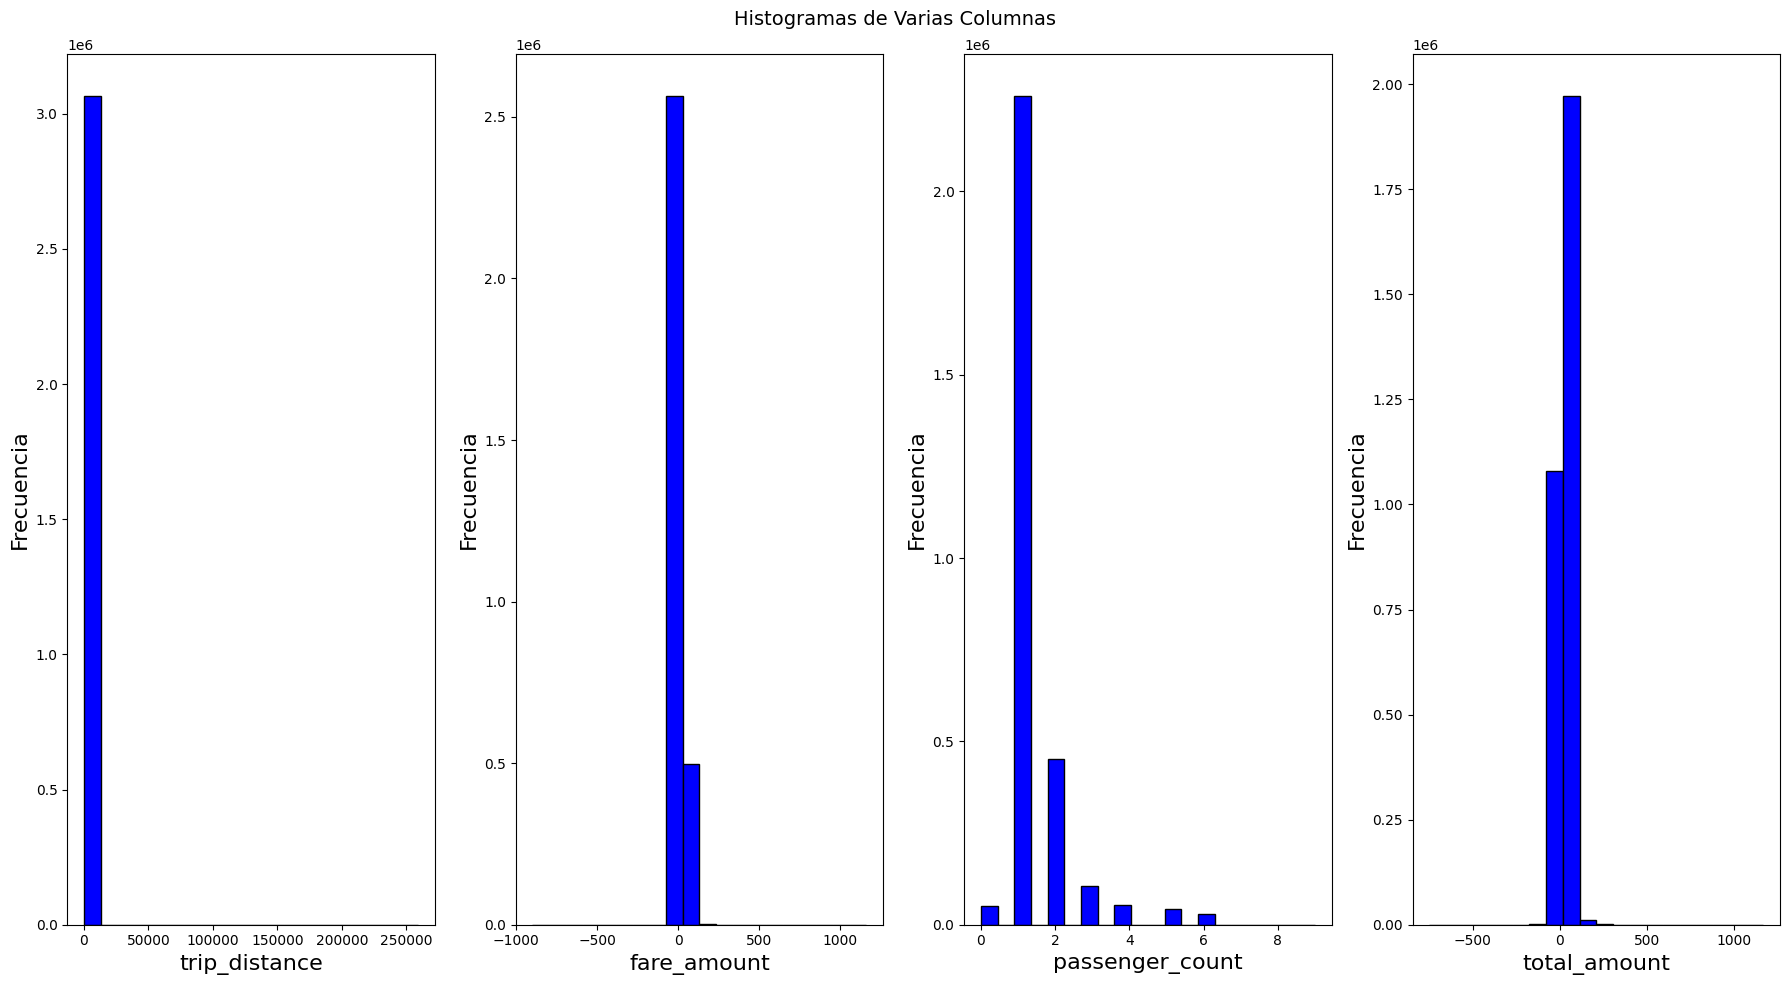

In [35]:
# Carga tus datos en un DataFrame (reemplaza 'tus_datos.csv' con la ubicación de tu archivo CSV)
data = pd.read_csv('taxi_2023-01.csv')

# Especifica las columnas que deseas incluir en los histogramas
columns_to_plot = ['trip_distance', 'fare_amount', 'passenger_count', 'total_amount']

# Crea subplots para los histogramas
fig, axes = plt.subplots(1, len(columns_to_plot), figsize=(18, 10))

# Itera a través de las columnas y crea un histograma para cada una
for i, column in enumerate(columns_to_plot):
    axes[i].hist(data[column], bins=20, color='blue', edgecolor='black')
    axes[i].set_xlabel(column, fontsize=16)  # Aumenta el tamaño de letra
    axes[i].set_ylabel('Frecuencia', fontsize=16)  # Aumenta el tamaño de letra

# Agrega un título a toda la figura
fig.suptitle('Histogramas de Varias Columnas', fontsize=14)  # Aumenta el tamaño de letra

# Ajusta el espacio entre los subplots para evitar solapamientos
plt.tight_layout()

# Muestra la figura
plt.show()

- trip-distance y passenger_count: En este tipo de distribución, la mayoría de los valores se encuentran en el lado izquierdo, y algunos valores excepcionalmente altos se encuentran en el lado derecho, creando esa "cola". Es una distribución asimétrica a la derecha, también conocida como una distribución sesgada positivamente.

- fare amount y total amount: Este tipo de distribución se conoce como una distribución aproximadamente simétrica o normal, y es común en muchos conjuntos de datos del mundo real. En una distribución normal, la mayoría de los datos se concentran en el centro (cerca de la media), y a medida que te alejas de la media en cualquier dirección, la densidad de datos disminuye gradualmente. 

Outliers:

C:\Users\COMPUTER\AppData\Local\Temp\ipykernel_10084\3756921445.py:2: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('taxi_2023-01.csv')


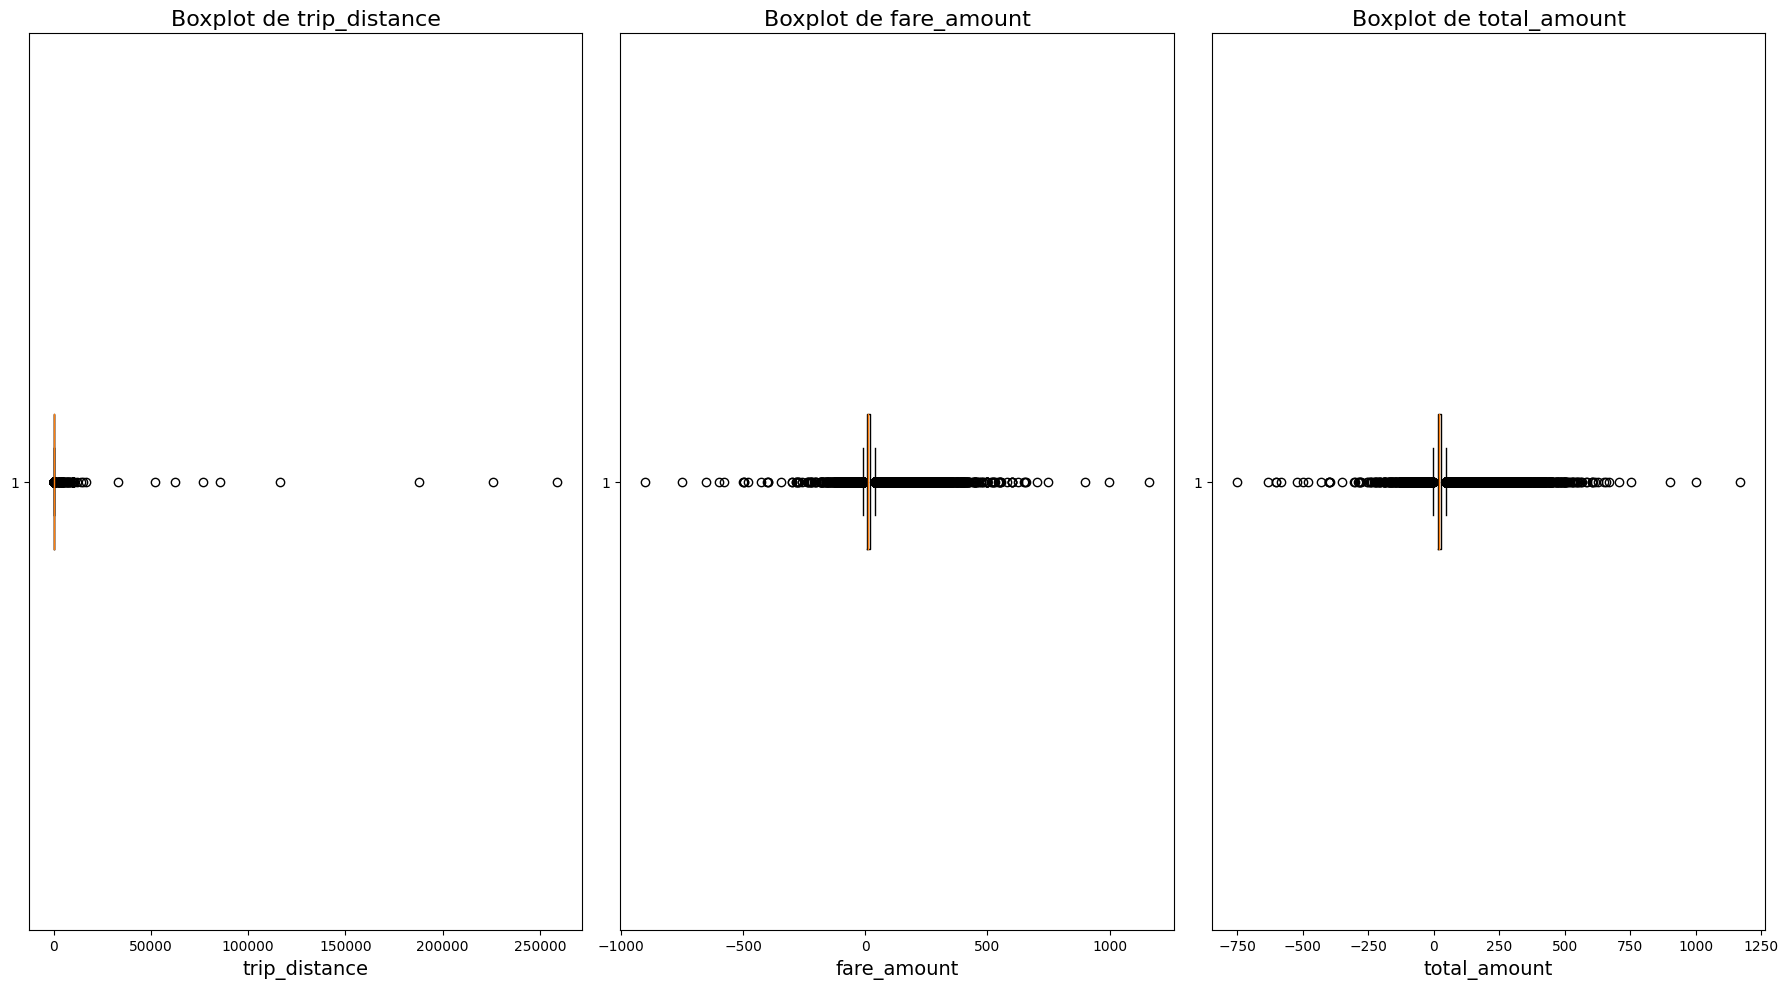

In [34]:
# Carga tus datos en un DataFrame (reemplaza 'taxi_2023-01.csv' con la ubicación de tu archivo CSV)
data = pd.read_csv('taxi_2023-01.csv')

# Especifica las columnas que deseas analizar en busca de outliers
columns_to_analyze = ['trip_distance', 'fare_amount', 'total_amount']

# Crea subplots para los boxplots
fig, axes = plt.subplots(1, len(columns_to_analyze), figsize=(18, 10))

# Itera a través de las columnas y crea un boxplot para cada una
for i, column in enumerate(columns_to_analyze):
    axes[i].boxplot(data[column], vert=False)
    axes[i].set_title(f'Boxplot de {column}', fontsize=16)  # Título del boxplot
    axes[i].set_xlabel(column, fontsize=14)  # Nombre de la columna en el eje x

# Ajusta el espacio entre los subplots para evitar solapamientos
plt.tight_layout()

# Muestra la figura
plt.show()

Se detectan prescencias de outlier que van a tener que ser estudiados para ver su injerencia en el análisis.

In [12]:
df2

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,PULBoroughs,DOLBoroughs
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.90,...,4.03,0.0,None,1.0,24.18,1.0,1.0,2.75,Brooklyn,Queens
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.70,...,2.64,0.0,None,1.0,15.84,1.0,1.0,0.00,Manhattan,Bronx
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.20,...,1.94,0.0,None,1.0,11.64,1.0,1.0,0.00,Manhattan,Queens
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.50,...,1.70,0.0,None,1.0,10.20,1.0,1.0,0.00,Manhattan,Manhattan
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.00,...,0.00,0.0,None,1.0,8.00,1.0,1.0,0.00,Manhattan,Brooklyn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,None,NaN,49,62,NaN,4070.82,15.70,...,0.00,0.0,None,1.0,16.70,NaN,NaN,NaN,Brooklyn,Brooklyn
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,None,NaN,10,205,NaN,2.14,4.41,...,0.00,0.0,None,1.0,5.41,NaN,NaN,NaN,Manhattan,Manhattan
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,None,NaN,66,37,NaN,3.44,16.53,...,3.51,0.0,None,1.0,21.04,NaN,NaN,NaN,Brooklyn,Manhattan
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,None,NaN,225,189,NaN,3.03,14.98,...,3.20,0.0,None,1.0,19.18,NaN,NaN,NaN,Manhattan,Queens


In [13]:
df1

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,PULBoroughs,DOLBoroughs
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,...,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00,Queens,Queens
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,...,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00,Bronx,Manhattan
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,...,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00,Manhattan,Manhattan
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,...,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25,Queens,Manhattan
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,...,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00,Brooklyn,Brooklyn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3066761,2,2023-01-31 23:58:34,2023-02-01 00:12:33,NaN,3.05,NaN,NaN,107,48,0,...,0.00,0.5,3.96,0.0,1.0,23.76,NaN,NaN,Brooklyn,Manhattan
3066762,2,2023-01-31 23:31:09,2023-01-31 23:50:36,NaN,5.80,NaN,NaN,112,75,0,...,0.00,0.5,2.64,0.0,1.0,29.07,NaN,NaN,Queens,Brooklyn
3066763,2,2023-01-31 23:01:05,2023-01-31 23:25:36,NaN,4.67,NaN,NaN,114,239,0,...,0.00,0.5,5.32,0.0,1.0,26.93,NaN,NaN,Queens,Manhattan
3066764,2,2023-01-31 23:40:00,2023-01-31 23:53:00,NaN,3.15,NaN,NaN,230,79,0,...,0.00,0.5,4.43,0.0,1.0,26.58,NaN,NaN,Manhattan,Brooklyn


¿Cuantos viajes llevan realizados en el mes de enero los taxis amarillos y los verdes?¿Cúal tiene mayor porcentaje?  

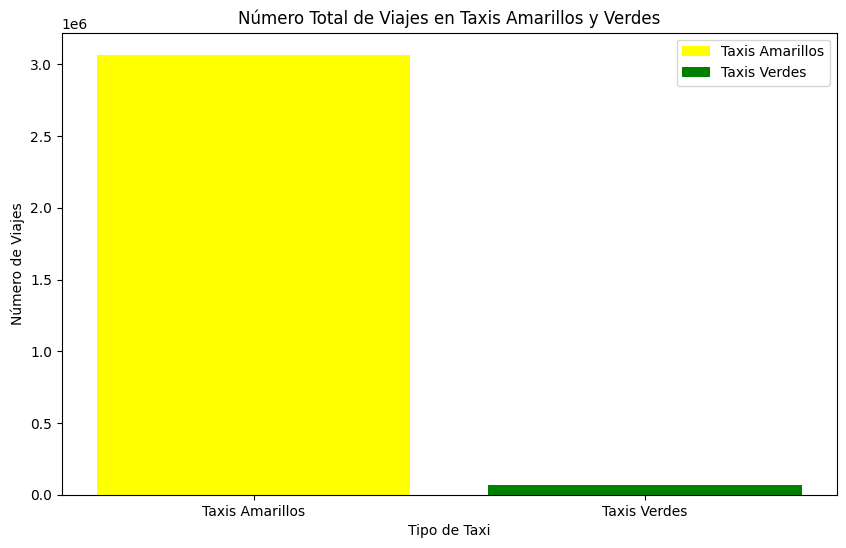

In [63]:
import pandas as pd
import matplotlib.pyplot as plt

# Contar el número total de viajes en taxis amarillos en df
total_viajes_amarillos = len(df1)

# Contar el número total de viajes en taxis verdes en df1
total_viajes_verdes = len(df2)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar('Taxis Amarillos', total_viajes_amarillos, color='yellow', label='Taxis Amarillos')
plt.bar('Taxis Verdes', total_viajes_verdes, color='green', label='Taxis Verdes')
plt.xlabel('Tipo de Taxi')
plt.ylabel('Número de Viajes')
plt.title('Número Total de Viajes en Taxis Amarillos y Verdes')
plt.legend()
plt.show()

En el gráfico podemos ver el total de viajes realizados entre viajes de taxis amarillos y verdes con un mayor porcentaje para taxis amarillos. 

¿En que distritos se hace el mayor pedido de taxis?

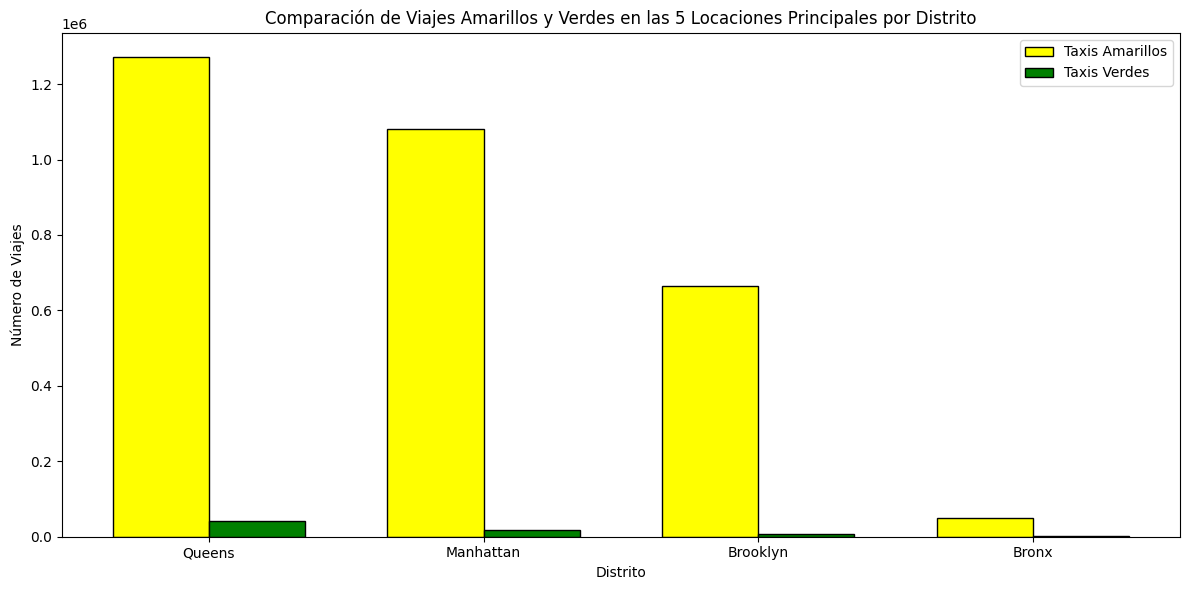

In [14]:
import numpy as np
import matplotlib.pyplot as plt
# Obtener las 5 locaciones desde las cuales se pidieron más taxis amarillos
top_locaciones_amarillos = df1['PULBoroughs'].value_counts().head(5)

# Obtener las 5 locaciones desde las cuales se pidieron más taxis verdes
top_locaciones_verdes = df2['PULBoroughs'].value_counts().head(5)

distritos = top_locaciones_amarillos.index  # Obtener los distritos desde los datos de taxis amarillos

# Definir el ancho de las barras
bar_width = 0.35

# Coordenadas para el eje x de las barras
x = np.arange(len(distritos))

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))

plt.bar(x - bar_width/2, top_locaciones_amarillos, bar_width, color='yellow', label='Taxis Amarillos', edgecolor='black')
plt.bar(x + bar_width/2, top_locaciones_verdes, bar_width, color='green', label='Taxis Verdes', edgecolor='black')

plt.xlabel('Distrito')
plt.ylabel('Número de Viajes')
plt.title('Comparación de Viajes Amarillos y Verdes en las 5 Locaciones Principales por Distrito')
plt.xticks(x, distritos)
plt.legend()
plt.tight_layout()

plt.show()

El distrito donde mas se pidieron viajes fue Queens que tb es uno de los mas extensos de New York.

¿Que flota de taxis tiene mayor ganancia ?

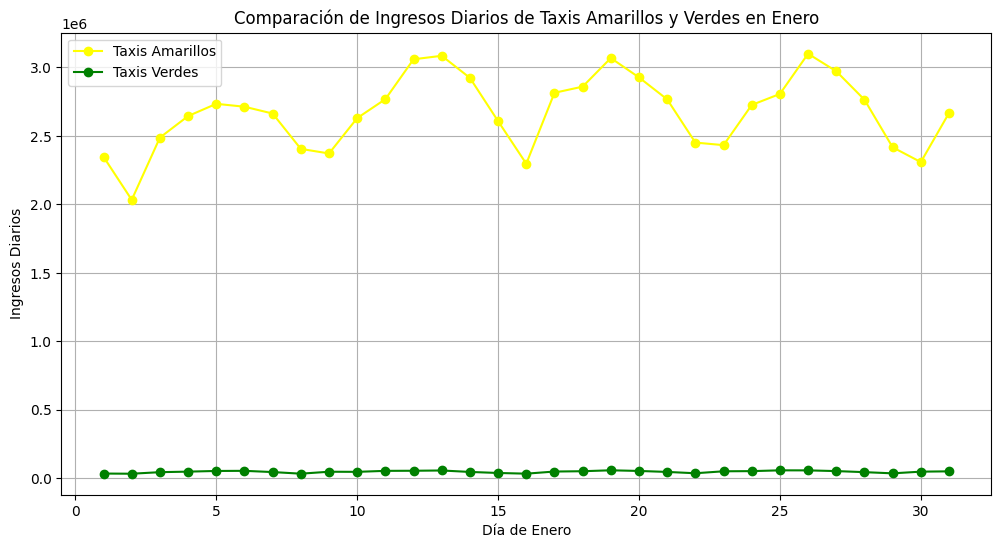

In [15]:
# Asegúrate de que las columnas de fecha sean de tipo datetime
df1['tpep_pickup_datetime'] = pd.to_datetime(df1['tpep_pickup_datetime'])
df2['lpep_pickup_datetime'] = pd.to_datetime(df2['lpep_pickup_datetime'])

# Filtrar los datos para enero
df1_january = df1[(df1['tpep_pickup_datetime'].dt.month == 1)]
df2_january = df2[(df2['lpep_pickup_datetime'].dt.month == 1)]

# Calcular ingresos diarios para ambos DataFrames
daily_income_df1 = df1_january.groupby(df1_january['tpep_pickup_datetime'].dt.day)['total_amount'].sum()
daily_income_df2 = df2_january.groupby(df2_january['lpep_pickup_datetime'].dt.day)['total_amount'].sum()

# Crear la serie temporal de ingresos
plt.figure(figsize=(12, 6))
plt.plot(daily_income_df1.index, daily_income_df1.values, marker='o', label='Taxis Amarillos', color='yellow')
plt.plot(daily_income_df2.index, daily_income_df2.values, marker='o', label='Taxis Verdes', color='green')
plt.xlabel('Día de Enero')
plt.ylabel('Ingresos Diarios')
plt.title('Comparación de Ingresos Diarios de Taxis Amarillos y Verdes en Enero')
plt.grid(True)
plt.legend()
plt.show()

Podemos ver que la tendencia continua los viajes en taxis amarillos recaudan mas.

¿En que horario se da el pico de consumo del servicio de taxis?

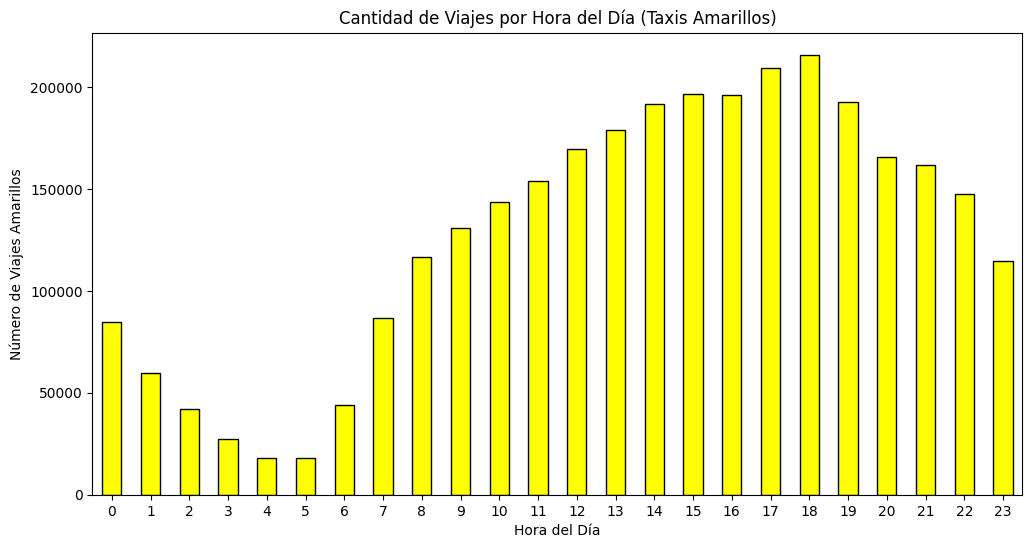

In [16]:

# Asegúrate de que las columnas de fecha sean de tipo datetime
df1['tpep_pickup_datetime'] = pd.to_datetime(df1['tpep_pickup_datetime'])

# Extrae la hora del día y crea una nueva columna
df1['hour_of_day'] = df1['tpep_pickup_datetime'].dt.hour

# Cuenta la cantidad de viajes por hora
trips_by_hour_yellow = df1['hour_of_day'].value_counts().sort_index()

# Gráfico de barras para taxis amarillos
plt.figure(figsize=(12, 6))
trips_by_hour_yellow.plot(kind='bar', color='yellow', edgecolor='black')
plt.xlabel('Hora del Día')
plt.ylabel('Número de Viajes Amarillos')
plt.title('Cantidad de Viajes por Hora del Día (Taxis Amarillos)')
plt.xticks(rotation=0)
plt.show()


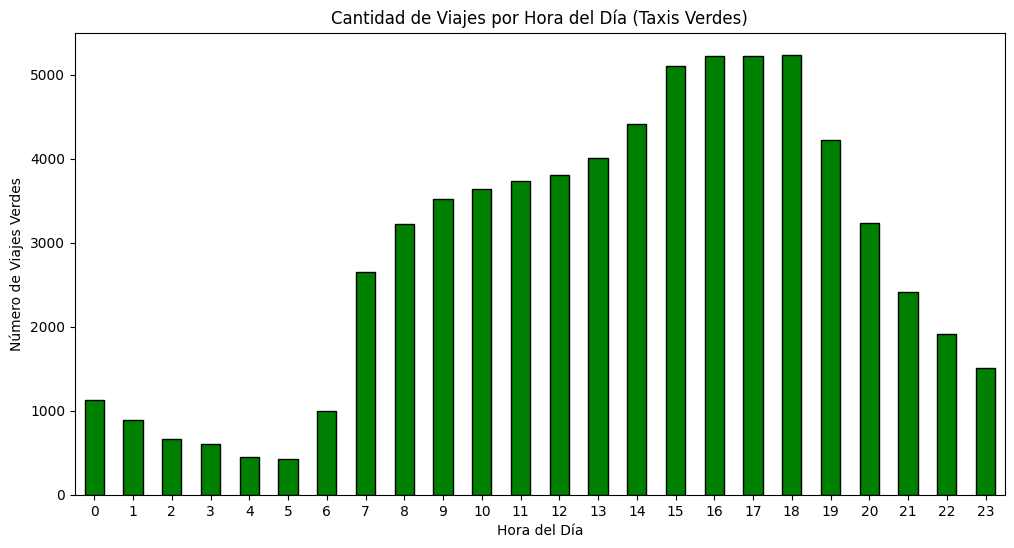

In [17]:
# Asegúrate de que las columnas de fecha sean de tipo datetime
df2['lpep_pickup_datetime'] = pd.to_datetime(df2['lpep_pickup_datetime'])

# Extrae la hora del día y crea una nueva columna
df2['hour_of_day'] = df2['lpep_pickup_datetime'].dt.hour

# Cuenta la cantidad de viajes por hora
trips_by_hour_green = df2['hour_of_day'].value_counts().sort_index()

# Gráfico de barras para taxis verdes
plt.figure(figsize=(12, 6))
trips_by_hour_green.plot(kind='bar', color='green', edgecolor='black')
plt.xlabel('Hora del Día')
plt.ylabel('Número de Viajes Verdes')
plt.title('Cantidad de Viajes por Hora del Día (Taxis Verdes)')
plt.xticks(rotation=0)
plt.show()

En las 2 gráficas podemos observar que el servicio es mas demandado tanto 9 10 de la mañana que coincide con la entrada al trabajo y entre las 16 y 19 que coincide con el fin del horario laboral

Tarifa Promedio para el mes de Enero 

In [18]:
# Calcula el promedio de la tarifa de los taxis amarillos
average_fare_yellow = df1['fare_amount'].mean()

print(f'El promedio de la tarifa de los taxis amarillos es: ${average_fare_yellow:.2f}')

El promedio de la tarifa de los taxis amarillos es: $18.37


In [19]:
# Calcula el promedio de la tarifa de los taxis amarillos
average_fare_yellow = df2['fare_amount'].mean()

print(f'El promedio de la tarifa de los taxis amarillos es: ${average_fare_yellow:.2f}')

El promedio de la tarifa de los taxis amarillos es: $16.60


En la tarifa promedio la diferencia no es mucho pero el taxi electrico es mas barato con una diferencia de 2$.

In [5]:
df3 =pd.read_csv('ElectricCarData_Clean.csv')

In [6]:
df3

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,Nissan,Ariya 63kWh,7.5,160,330,191,440,Yes,FWD,Type 2 CCS,Hatchback,C,5,45000
99,Audi,e-tron S Sportback 55 quattro,4.5,210,335,258,540,Yes,AWD,Type 2 CCS,SUV,E,5,96050
100,Nissan,Ariya e-4ORCE 63kWh,5.9,200,325,194,440,Yes,AWD,Type 2 CCS,Hatchback,C,5,50000
101,Nissan,Ariya e-4ORCE 87kWh Performance,5.1,200,375,232,450,Yes,AWD,Type 2 CCS,Hatchback,C,5,65000


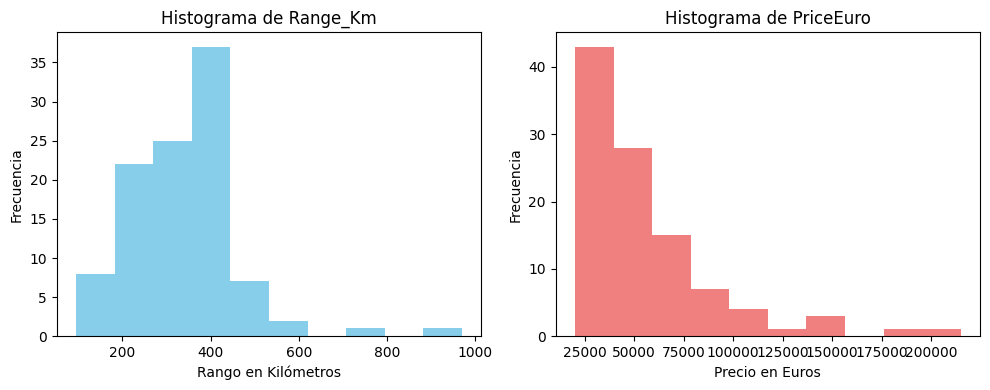

In [10]:
# Crear histograma de Range_Km
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.hist(df['Range_Km'], bins=10, color='skyblue')
plt.title('Histograma de Range_Km')
plt.xlabel('Rango en Kilómetros')
plt.ylabel('Frecuencia')

# Crear histograma de PriceEuro
plt.subplot(1, 2, 2)
plt.hist(df['PriceEuro'], bins=10, color='lightcoral')
plt.title('Histograma de PriceEuro')
plt.xlabel('Precio en Euros')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

En este tipo de distribución, la mayoría de los valores se encuentran en el lado izquierdo, y algunos valores excepcionalmente altos se encuentran en el lado derecho, creando esa "cola". Es una distribución asimétrica a la derecha, también conocida como una distribución sesgada positivamente.

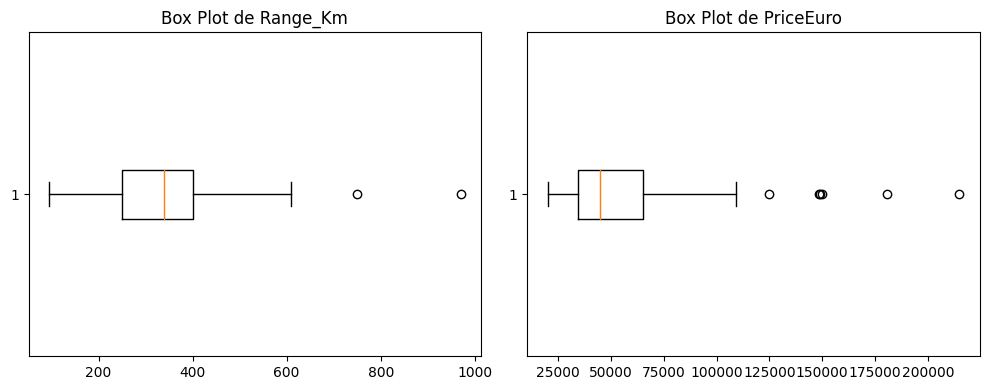

In [11]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.boxplot(df['Range_Km'], vert=False)
plt.title('Box Plot de Range_Km')

plt.subplot(1, 2, 2)
plt.boxplot(df['PriceEuro'], vert=False)
plt.title('Box Plot de PriceEuro')

plt.tight_layout()
plt.show()

Se pueden ver muy poca cantidad de Outliers habría que analizarlos para obtener conclusiones

¿Cual es el auto con mejor rendimiento por km?

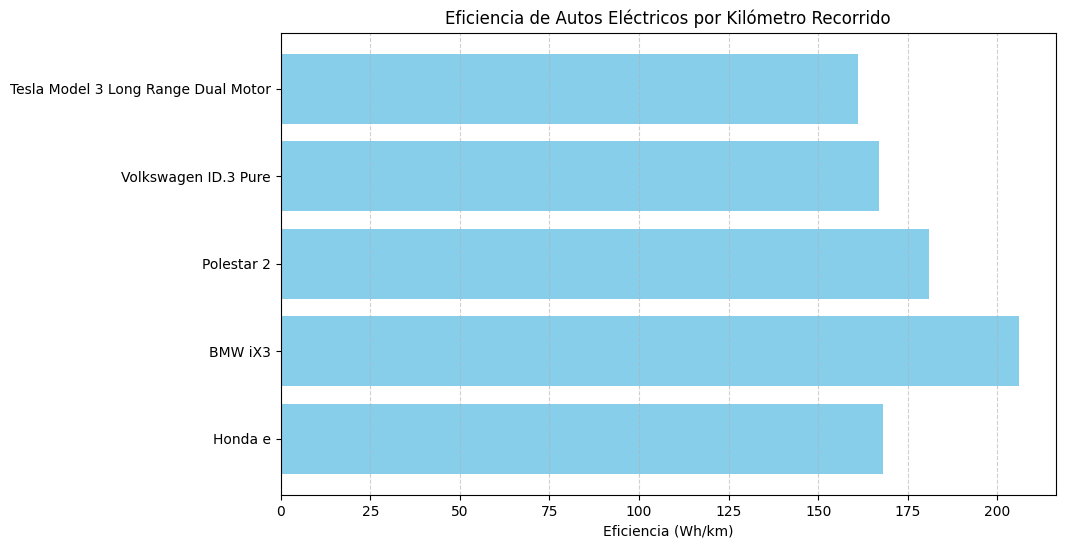

In [12]:
# Datos de eficiencia en Wh/km
autos = [
    "Tesla Model 3 Long Range Dual Motor",
    "Volkswagen ID.3 Pure",
    "Polestar 2",
    "BMW iX3",
    "Honda e"
]
eficiencia = [161, 167, 181, 206, 168]

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.barh(autos, eficiencia, color='skyblue')
plt.xlabel('Eficiencia (Wh/km)')
plt.title('Eficiencia de Autos Eléctricos por Kilómetro Recorrido')
plt.gca().invert_yaxis()  # Para mostrar el auto más eficiente en la parte superior
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Mostrar el gráfico
plt.show()